In [1]:
!rm -r '/content/plots'

In [2]:
from scipy import special as sp
from scipy.stats import gaussian_kde
import random
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams.update({'figure.max_open_warning': 0})
# np.seterr(all='raise')

### PARAMETERS
nMaxGen = 100
nPopulation = 1000
kappa = 1
mu = 4
r_hat = 1
numSamples = 200 # number of generated samples
numSim = 10**6 # number of gaussian points
theta = [kappa, mu, r_hat]
savePlots = True
showPlots = True

In [3]:
class KappaMu():
  '''
  KappaMu fading distribution Class
  '''
  def __init__(self, kappa, mu, r_hat, numSamples, numSim):
    # Parameters
    self.kappa = kappa
    self.mu = mu
    self.r_hat = r_hat  
    self.numSamples = numSamples
    self.numSim = numSim

    # For simulated densities
    self.generateSamples = self.generateSamples()
    self.X, self.Y = self.envelopeDensity(self.numSamples)

  def _pdf(self, r):
    '''
    Function to calculate kappa-mu pdf.
    Equation extracted from:
    https://www.fee.unicamp.br/sites/default/files/docentes/michel/the_kappa-mu_distribution_and_the_eta-mu_distribution.pdf
    Eq. (1) with rho = R = r / r_hat
    '''

    A = (2*self.mu * ((1 + self.kappa)**((self.mu+1)/2))) \
            /((self.kappa**((self.mu - 1)/2)) * np.exp(self.mu * self.kappa))
    R = r / self.r_hat
    B = (R**self.mu) * np.exp(- self.mu*(1 + self.kappa)*(R**2))
    C = sp.iv(self.mu - 1, 2*self.mu * R * np.sqrt(self.kappa*(1 + self.kappa)))
    PDF = A * B * C / self.r_hat 
    return PDF

  def scatteredComponent(self):
    '''
    Function to calculate scattered signal component's power
    '''
  
    sigma = self.r_hat / np.sqrt( 2 * self.mu * (1+self.kappa) )
  
    return sigma

  def generateGaussians(self, mean, sigma):
    '''
    Function to generate gaussian RVs
    '''

    gaussians = np.random.default_rng().normal(mean, sigma, self.numSim)
      
    return gaussians

  def generateSamples(self):
    '''
    Function to generate complex kappa-mu fading RVs
    '''
    
    p_i, q_i = self.calculateMeans()
    sigma = self.scatteredComponent()
    
    fading = 0
    for i in range(int(self.mu)):
        X_i = self.generateGaussians(p_i, sigma)
        Y_i = self.generateGaussians(q_i, sigma)
        fading = fading + X_i**(2) + Y_i**(2)  
    return fading

  def calculateMeans(self):
    '''
    Function to calculate IQ means
    '''
  
    d2 = (self.r_hat**(2) * self.kappa)/(1 + self.kappa);
  
    p_i = np.sqrt(d2/(2*self.mu))
    q_i = np.copy(p_i)
      
    return p_i, q_i

  def envelopeDensity(self, numSamples):
    '''
    Function for returning X and Y axes for each
    densities for each simulated sample
    '''
      
    R = np.sqrt(self.generateSamples)
    kde = gaussian_kde(R)
    x = np.linspace(R.min(), R.max(), numSamples)
    y = kde(x)
    
    return x, y

====== 200 kappa-mu samples succesfully generated! ======


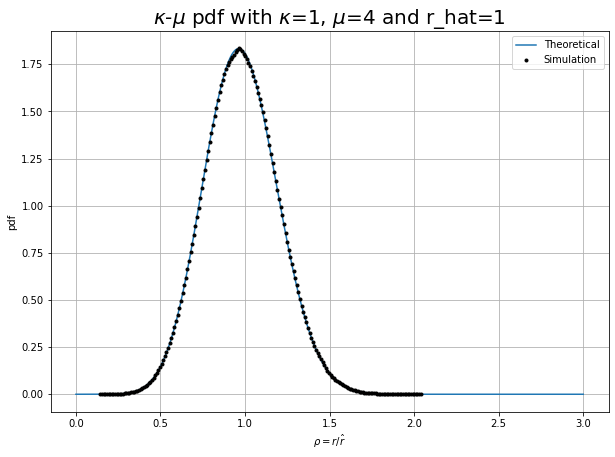

In [4]:
ku = KappaMu(kappa, mu, r_hat, numSamples, numSim) # instantiate KappaMu object
X = ku.X
Y = ku.Y
n = len(X)

# Plotting
print(f'====== {numSamples} kappa-mu samples succesfully generated! ======')
r = np.linspace(0, 3, 3000)# theoretical envelope PDF x axes
plt.figure(figsize=((10,7)))
plt.plot(r, ku._pdf(r), label='Theoretical')
plt.plot(ku.X, ku.Y, "k.", label='Simulation')
plt.title(r'$\kappa$-$\mu$ pdf with $\kappa$={}, $\mu$={} and r_hat={}'.format(kappa,mu,r_hat), fontsize=20)
plt.legend()
plt.grid(True)
plt.xlabel(r'$\rho=r/\hat{r}$')
plt.ylabel('pdf')
plt.show()

In [5]:
## Auxiliary Methods
def computePDF(r, kappa, mu, r_hat):
  '''
  Function to calculate kappa-mu pdf.
  Equation extracted from:
  https://www.fee.unicamp.br/sites/default/files/docentes/michel/the_kappa-mu_distribution_and_the_eta-mu_distribution.pdf
  Eq. (1) with rho = R = r / r_hat
  '''

  A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
          /((kappa**((mu - 1)/2)) * np.exp(mu * kappa))
  R = r / r_hat
  B = (R**mu) * np.exp(- mu*(1 + kappa)*(R**2))
  C = sp.iv(mu - 1, 2*mu * R * np.sqrt(kappa*(1 + kappa)))
  PDF = A * B * C / r_hat 
  return PDF

def fitness(x,y,z):
  '''
  Fitness function (MSE) to determine how good a given solution is.
  '''
  global X
  global Y
  y_pred = computePDF(X, x, y, z)
  cost = 1/n * sum(val**2 for val in (Y-y_pred))
  return 1/cost

## Instantiate KappaMu object 
ku = KappaMu(kappa, mu, r_hat, numSamples, numSim) 
X = ku.X
Y = ku.Y
n = len(X)

## Set up directories
paths = ['plots', 
            'plots/gen/', 
        ]
for i in paths:
    if not os.path.exists(i):
        os.makedirs(i)

=== Generation: 0 === 
Fitness: 54.00646495155806
Best individual:
Kappa: 8.807042868402698
Mu: 1.26702967930394
R_hat: 1.0374243528352265



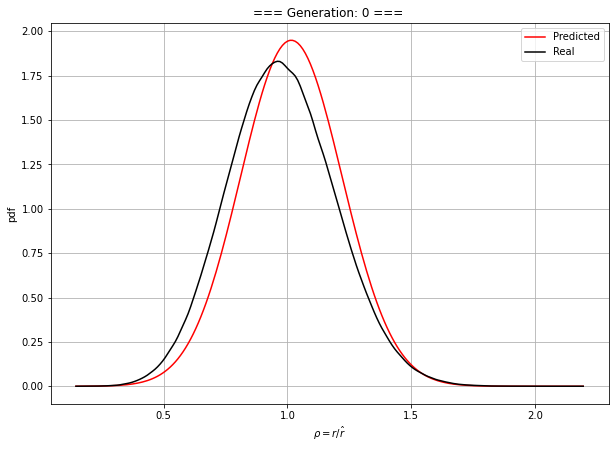

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 1 === 
Fitness: nan
Best individual:
Kappa: 5.565736399409469
Mu: 1.1969786909431457
R_hat: 0.021485267309195713



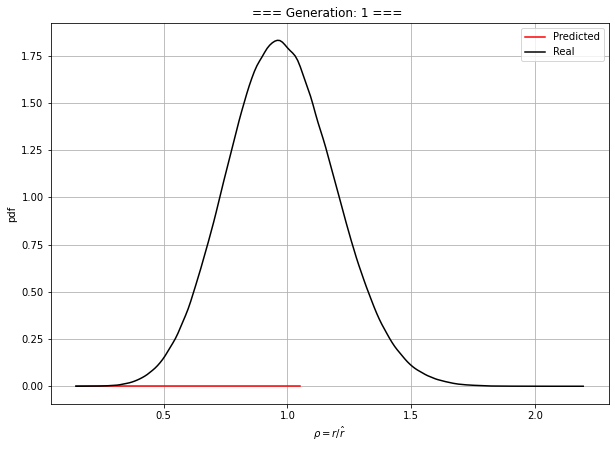

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 2 === 
Fitness: 221.44177693980535
Best individual:
Kappa: 0.10146865725025121
Mu: 6.069151417975397
R_hat: 1.0160457075179101



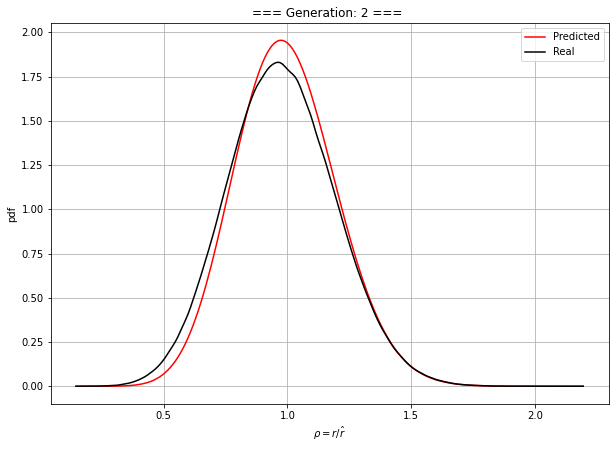

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 3 === 
Fitness: 232.3277211243217
Best individual:
Kappa: 7.811144262650356
Mu: 1.0260936410018275
R_hat: 1.0147389754820597



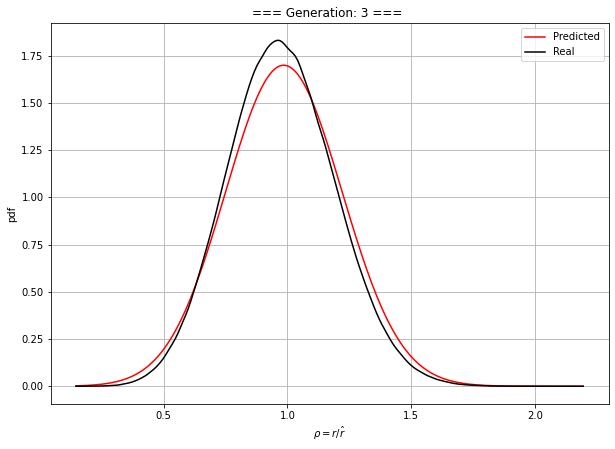

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 4 === 
Fitness: 306.3029859431371
Best individual:
Kappa: 0.021566490806345113
Mu: 4.908450820768192
R_hat: 1.0275445905412903



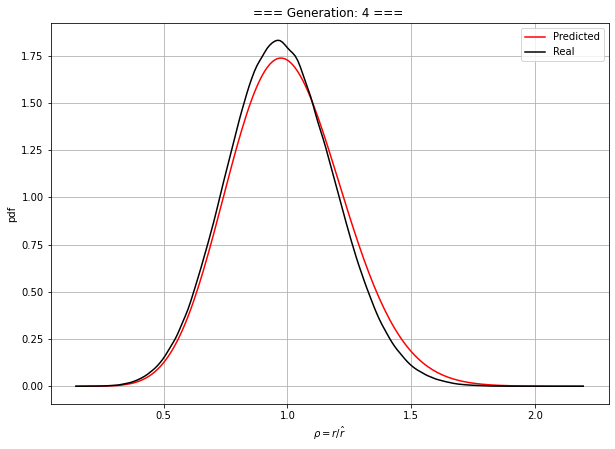

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 5 === 
Fitness: 453.67462476860896
Best individual:
Kappa: 0.915760330340964
Mu: 4.106750698390373
R_hat: 1.0190018721326888



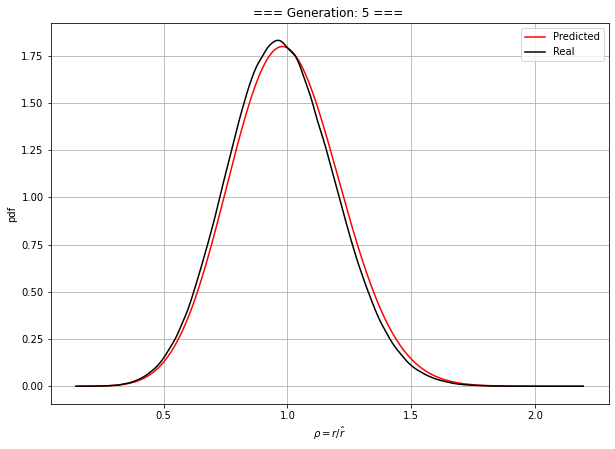

=== Generation: 6 === 
Fitness: 359.9130389101472
Best individual:
Kappa: 8.16948994470685
Mu: 1.1973217677209191
R_hat: 0.9801298881049091



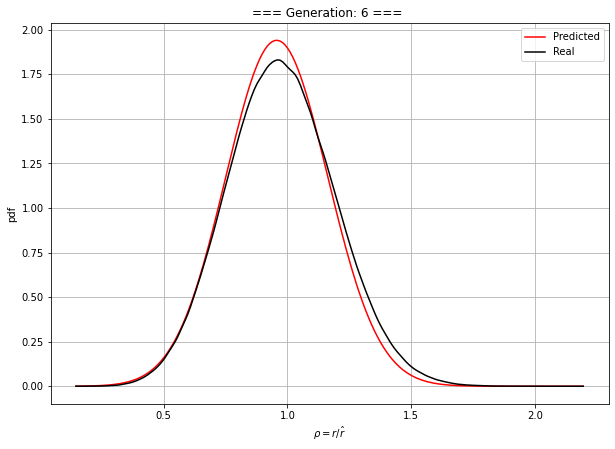

=== Generation: 7 === 
Fitness: 607.7958688672668
Best individual:
Kappa: 2.2997653968297276
Mu: 2.6074013588679303
R_hat: 1.0112230663916182



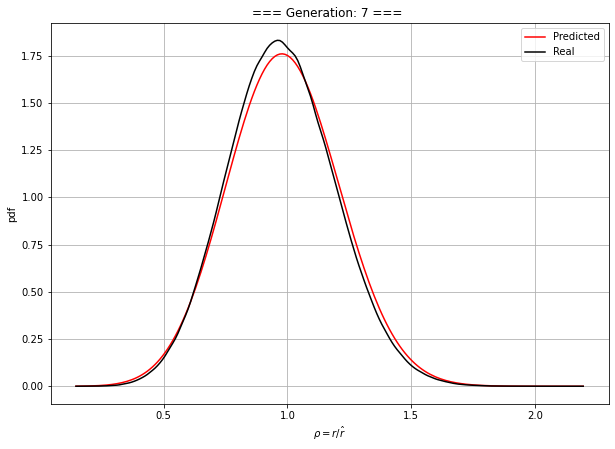

=== Generation: 8 === 
Fitness: 782.5596567436344
Best individual:
Kappa: 1.0299690160323796
Mu: 3.7572011923356023
R_hat: 0.9875850094981832



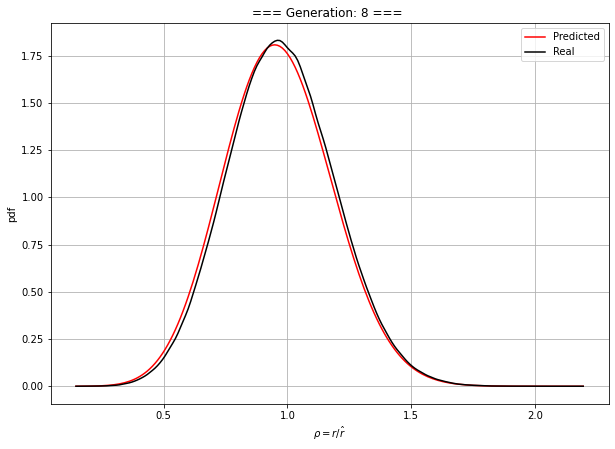

=== Generation: 9 === 
Fitness: 2269.505896641727
Best individual:
Kappa: 1.0324232013214876
Mu: 3.727065735641735
R_hat: 0.9970140740592563



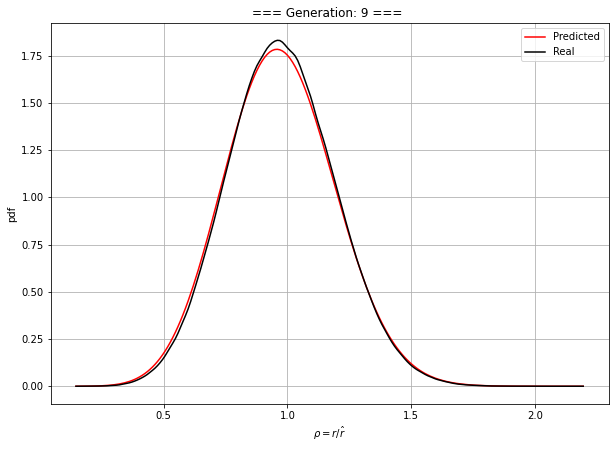

=== Generation: 10 === 
Fitness: 2884.0354954578006
Best individual:
Kappa: 1.0569033333963649
Mu: 3.765447122209921
R_hat: 1.0051380205789093



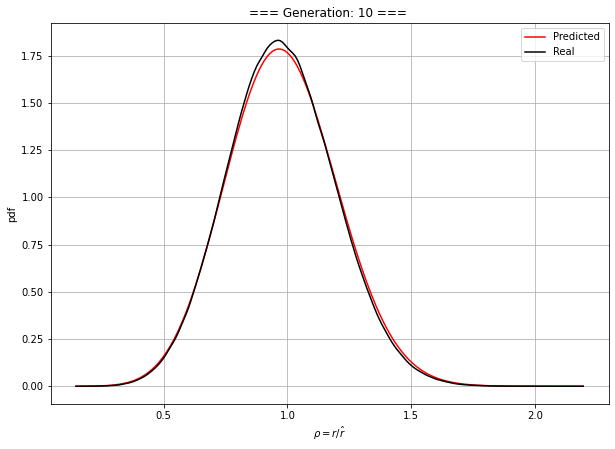

=== Generation: 11 === 
Fitness: 2868.575613566784
Best individual:
Kappa: 0.9912494150509479
Mu: 3.8610512144078015
R_hat: 1.0058985549395003



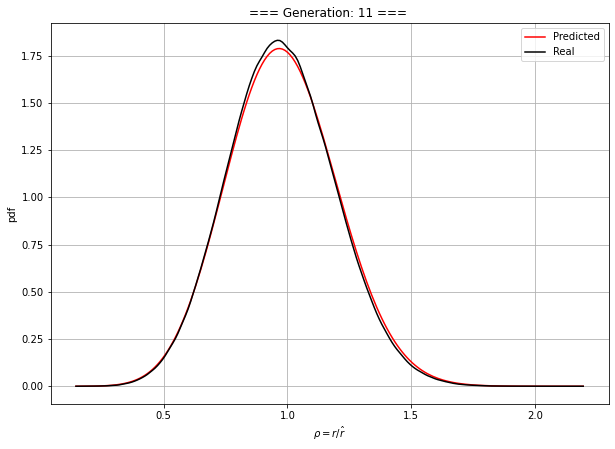

=== Generation: 12 === 
Fitness: 8069.704819046929
Best individual:
Kappa: 1.0272751316105417
Mu: 3.9831529451559153
R_hat: 0.996035044163182



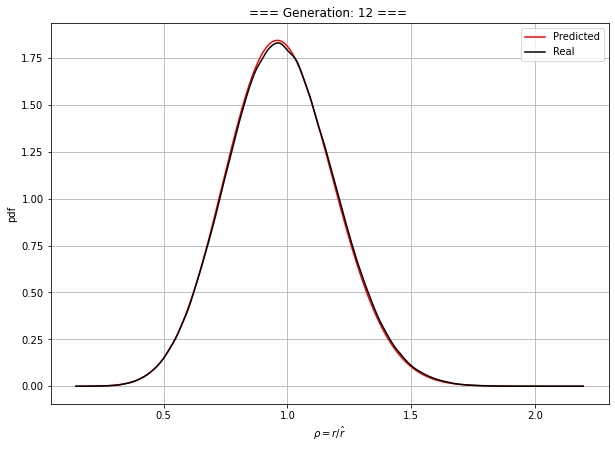

=== Generation: 13 === 
Fitness: 7126.111057121425
Best individual:
Kappa: 1.0399722338560367
Mu: 3.8488981997930396
R_hat: 1.003585892538637



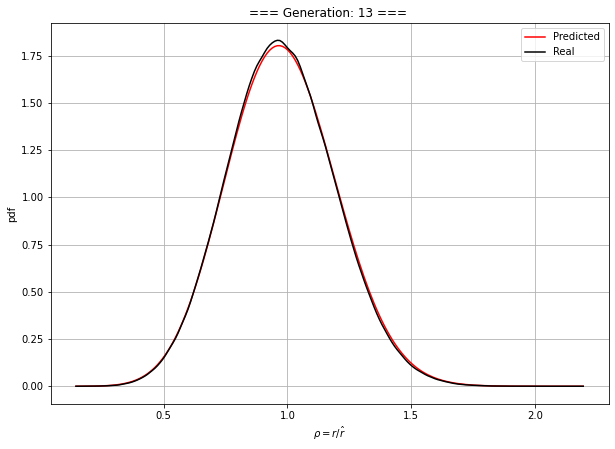

=== Generation: 14 === 
Fitness: 74630.4475418529
Best individual:
Kappa: 1.0021467881344026
Mu: 3.951124079644286
R_hat: 0.9993621620638407



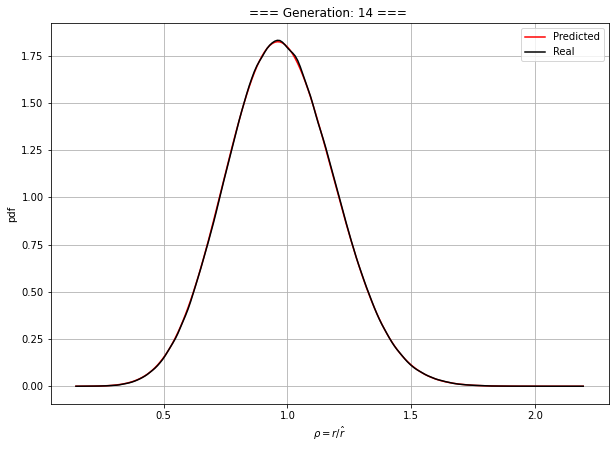

=== Generation: 15 === 
Fitness: 19572.44600318584
Best individual:
Kappa: 0.9663385754825573
Mu: 3.959527377358986
R_hat: 1.001770302638746



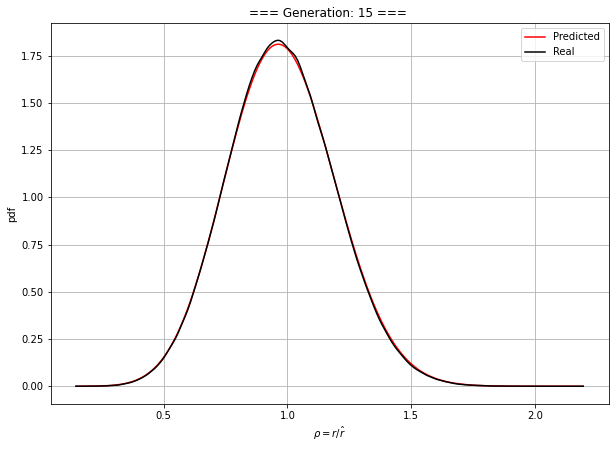

=== Generation: 16 === 
Fitness: 35198.34470586327
Best individual:
Kappa: 1.0065574396407255
Mu: 4.004972045396993
R_hat: 0.998820146611291



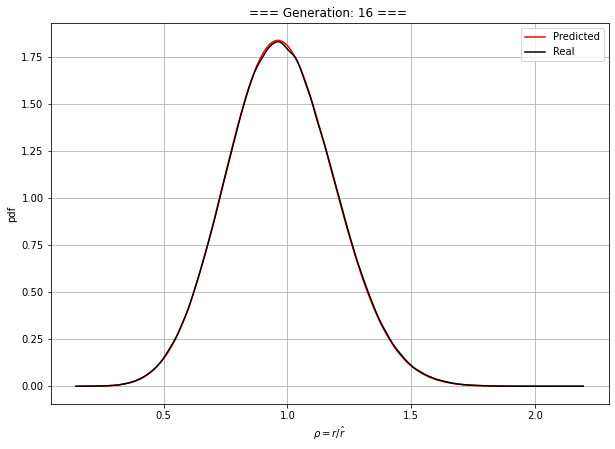

=== Generation: 17 === 
Fitness: 44005.22115524612
Best individual:
Kappa: 1.0066530416378863
Mu: 4.009648895067442
R_hat: 1.0003805572921793



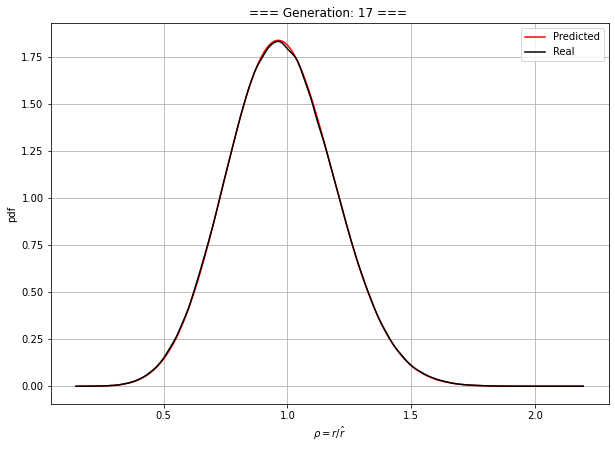

=== Generation: 18 === 
Fitness: 30880.459209271492
Best individual:
Kappa: 1.0111454487117173
Mu: 4.014810845657893
R_hat: 0.9995317678648705



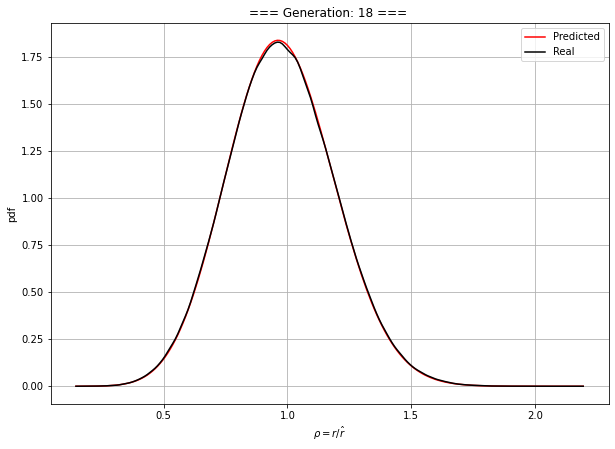

=== Generation: 19 === 
Fitness: 77772.37584411065
Best individual:
Kappa: 0.9983194119702361
Mu: 3.988606020405603
R_hat: 1.0009823812417444



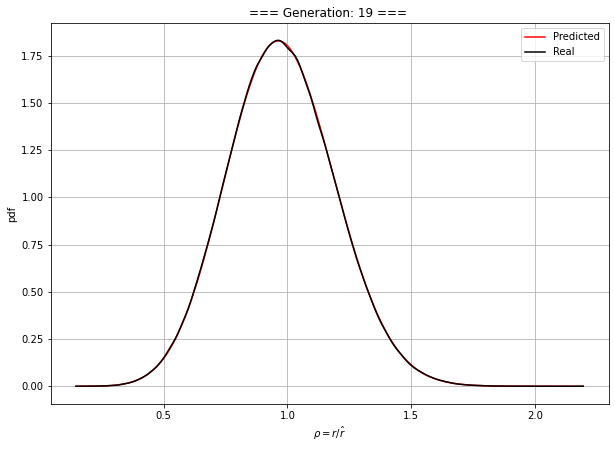

=== Generation: 20 === 
Fitness: 132616.43341872195
Best individual:
Kappa: 0.9856954933595286
Mu: 3.989679054599799
R_hat: 0.999735991781368



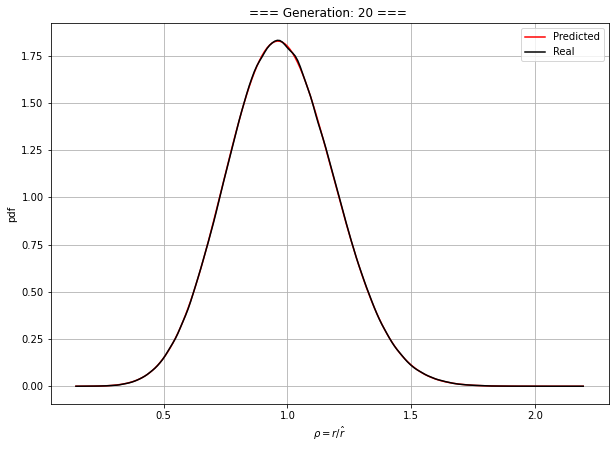

Stopped by fitness criteria!

Best Fitness:132616.43341872195
Best Gen:20
Kappa:0.9856954933595286
Mu:3.989679054599799
r_hat:0.999735991781368


In [13]:
solutions = []
bestParams = []
bestCriteria = 0
bestGen = 0


# Generate solutions (chromossomes)
for s in range(nPopulation):
  solutions.append((random.uniform(0.01, 10), # kappa
                      random.uniform(0.01, 10), # mu
                      random.uniform(1, 10))) # r_hat

# Evolutionary Loop
for i in range(nMaxGen):
  rankedSolutions = []	
  for s in solutions:
    rankedSolutions.append( (fitness(s[0],s[1],s[2]), s) )
  rankedSolutions.sort()
  rankedSolutions.reverse()
  
  print(f'=== Generation: {i} === ')
  print(f'Fitness: {rankedSolutions[0][0]}')
  print('Best individual:')
  print(f'Kappa: {rankedSolutions[0][1][0]}')
  print(f'Mu: {rankedSolutions[0][1][1]}')
  print(f'R_hat: {rankedSolutions[0][1][2]}\n')

  plt.figure(figsize=((10,7)))
  plt.plot(ku.X, computePDF(ku.X, rankedSolutions[0][1][0], rankedSolutions[0][1][1], rankedSolutions[0][1][2]), "r", label='Predicted')
  plt.plot(ku.X, ku.Y, "k", label='Real')
  plt.title(f'=== Generation: {i} === ')
  plt.legend()
  plt.grid(True)
  plt.xlabel(r'$\rho=r/\hat{r}$')
  plt.ylabel('pdf')
  if savePlots: 
    plt.savefig(f'plots/gen/gen_{i}.png')
  
  if showPlots:
    plt.show()
  else: 
    plt.clf()

  # Stop Criterion:
  if rankedSolutions[0][0] > bestCriteria:
    bestCriteria = rankedSolutions[0][0]
    bestGen = i
    bestParams = rankedSolutions[0][1]

  # Stop Criterion: Fitness > 100k
  if rankedSolutions[0][0] > 100000:
    print('='*10+'\n'+'Stopped by fitness criteria!\n'+'='*10+'\n')
    # print('='*10)
    # print('Stopped by fitness criteria!')
    # print('='*10)
    print('Best Fitness:{}\nBest Gen:{}'.format(bestCriteria, bestGen))
    print('Kappa:{}\nMu:{}\nr_hat:{}'.format(bestParams[0],bestParams[1],bestParams[2]))
    break

  # Combine the best solutions and make a new solution of those combined solutions
  bestSolutions = rankedSolutions[:100]
  elements = [] 
  for s in bestSolutions:
    elements.append(s[1][0])
    elements.append(s[1][1])
    elements.append(s[1][2])

  newGen = []
  for _ in range(nPopulation):
    e1 = random.choice(elements) * random.uniform(0.99,1.01) # Mutation of 2%
    e2 = random.choice(elements) * random.uniform(0.99,1.01) # Mutation of 2%
    e3 = random.choice(elements) * random.uniform(0.99,1.01) # Mutation of 2%

    newGen.append((e1,e2,e3))


  solutions = newGen
  
  if i == nMaxGen-1:
    print('='*10+'\n'+'Max number of generations exceeded!\n'+'='*10+'\n')
    # print()
    # print('='*10)
    print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
    print('Kappa: {}\nMu: {}\nr_hat: {}'.format(bestParams[0],bestParams[1],bestParams[2]))

In [7]:
# !zip -r '/content/plots/plots.zip' '/content/plots/gen2' 

In [8]:
nMaxGen

100

In [9]:
rankedSolutions[0][1]

(0.9974585081237384, 3.987503640448196, 1.0003114503721653)

In [10]:
type(rankedSolutions[0][1])

tuple

In [11]:
Params = []
Params = rankedSolutions[0][1]

In [12]:
Params[0]

0.9974585081237384